<a href="https://colab.research.google.com/github/gunjanak/Geo_in_python/blob/main/plotting_districts_local_unit_nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#package installation

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

#Importing libraries

In [115]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [116]:
%matplotlib inline

#Read The District data

In [117]:
nepal_pro = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Rajesh_ko_homework/Nepal_hydro/Nepal_province/District/districts.shp")
nepal_pro.head()

,fid,DISTRICT,FIRST_STAT,FIRST_DIST,geometry
0,1,ACHHAM,7.0,ACHHAM,"POLYGON ((81.17111 29.38643, 81.17146 29.38629..."
1,2,ARGHAKHANCHI,5.0,ARGHAKHANCHI,"POLYGON ((83.00440 28.11188, 83.00485 28.11177..."
2,3,BAGLUNG,4.0,BAGLUNG,"POLYGON ((83.09957 28.63442, 83.10086 28.63401..."
3,4,BAITADI,7.0,BAITADI,"POLYGON ((80.75833 29.70446, 80.75852 29.70422..."
4,5,BAJHANG,7.0,BAJHANG,"POLYGON ((81.08994 30.05411, 81.09021 30.05410..."


#Plotting map

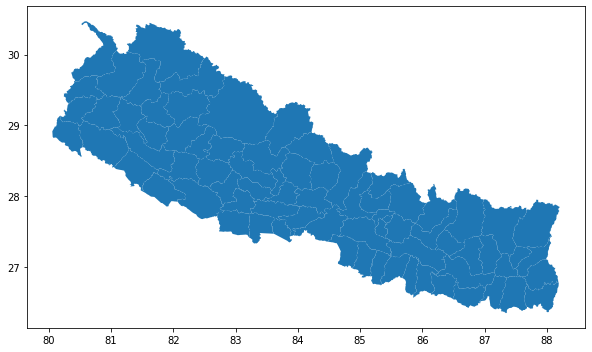

In [118]:
nepal_pro.plot(figsize=(10, 8))

#Extracting Province

In [119]:
province = nepal_pro['FIRST_STAT'].unique()

In [120]:
province

array([7., 5., 4., 2., 3., 1., 6.])

In [121]:
pro_2 = nepal_pro[nepal_pro.FIRST_STAT == 2]

In [122]:
pro_2

,fid,DISTRICT,FIRST_STAT,FIRST_DIST,geometry
7,8,BARA,2.0,BARA,"POLYGON ((84.99693 27.36479, 84.99736 27.36468..."
18,19,DHANUSHA,2.0,DHANUSHA,"POLYGON ((85.91400 27.12966, 85.91413 27.12964..."
39,40,MAHOTTARI,2.0,MAHOTTARI,"POLYGON ((85.82713 27.16752, 85.82738 27.16752..."
53,54,PARSA,2.0,PARSA,"POLYGON ((84.56515 27.46308, 84.56651 27.46236..."
57,58,RAUTAHAT,2.0,RAUTAHAT,"POLYGON ((85.29800 27.23107, 85.30060 27.23039..."
64,65,SAPTARI,2.0,SAPTARI,"POLYGON ((86.56406 26.78952, 86.56441 26.78909..."
65,66,SARLAHI,2.0,SARLAHI,"POLYGON ((85.73508 27.19025, 85.73579 27.19021..."
68,69,SIRAHA,2.0,SIRAHA,"POLYGON ((86.16065 26.91432, 86.16110 26.91417..."


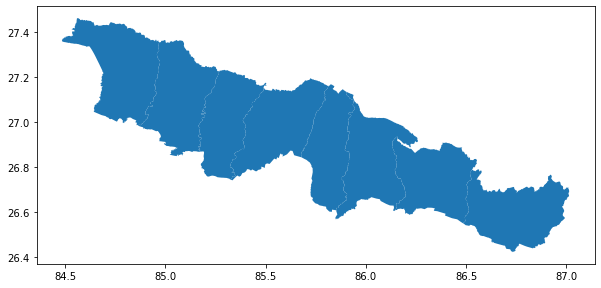

In [123]:
pro_2.plot(figsize=(10, 8))

#Labeling districts

In [124]:
pro_2['centroid'] = pro_2.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [125]:
pro_2.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


7     POINT (85.07052 27.10788)
18    POINT (86.03376 26.82867)
39    POINT (85.81980 26.87906)
53    POINT (84.78005 27.23961)
57    POINT (85.30221 27.00150)
64    POINT (86.74602 26.59805)
65    POINT (85.56520 26.98608)
68    POINT (86.34230 26.74638)
dtype: geometry

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


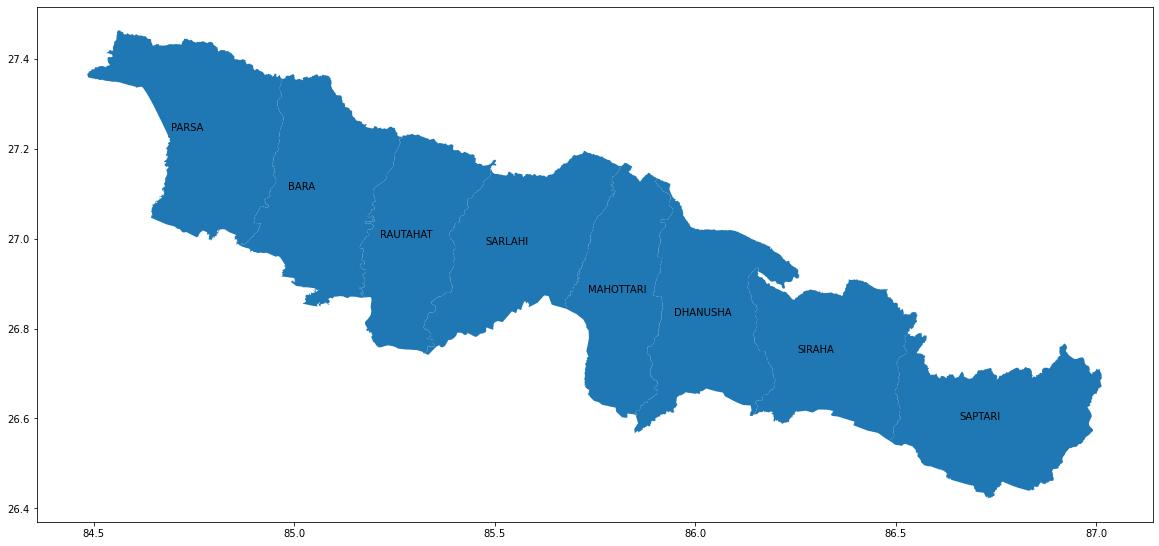

In [126]:
ax = pro_2.plot(figsize=(20, 16))
for x, y, label in zip(pro_2.centroid.x, pro_2.centroid.y, pro_2.DISTRICT):
  offset =0

  ax.annotate(label, xy=(x, y), xytext=(-35,0), textcoords="offset points")

#Loading local body data

In [127]:
nepal_loc = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Rajesh_ko_homework/Nepal_hydro/Nepal_province/Local/NepalLocalUnits0.shp")
nepal_loc.head()

,fid,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,1.0,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60719 27.37069, 87.60841 27.36969..."
1,7,1.0,TAPLEJUNG,Sidingba,Gaunpalika,1,"POLYGON ((88.04438 27.42030, 88.04365 27.41925..."
2,8,1.0,TAPLEJUNG,Sirijangha,Gaunpalika,1,"POLYGON ((88.14528 27.67003, 88.14526 27.66966..."
3,23,1.0,ILAM,Maijogmai,Gaunpalika,1,"POLYGON ((88.07660 27.03545, 88.07695 27.03533..."
4,24,1.0,ILAM,Mangsebung,Gaunpalika,1,"POLYGON ((87.76435 26.92431, 87.76435 26.92400..."


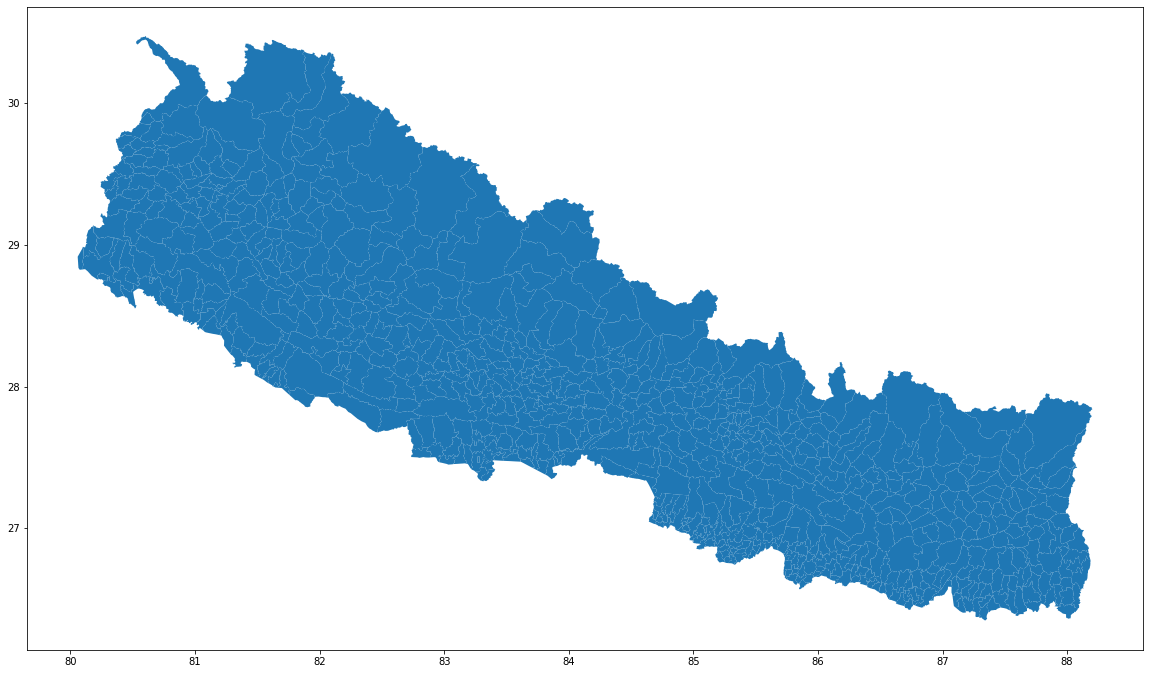

In [128]:
nepal_loc.plot(figsize=(20, 16))

#Plotting all local bodies of TAPLEJUNG

In [86]:
Taplejung = nepal_loc[nepal_loc.DISTRICT == "TAPLEJUNG"]

In [87]:
Taplejung

,fid,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,1.0,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60719 27.37069, 87.60841 27.36969..."
1,7,1.0,TAPLEJUNG,Sidingba,Gaunpalika,1,"POLYGON ((88.04438 27.42030, 88.04365 27.41925..."
2,8,1.0,TAPLEJUNG,Sirijangha,Gaunpalika,1,"POLYGON ((88.14528 27.67003, 88.14526 27.66966..."
21,2,1.0,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50137 27.42926, 87.50407 27.42856..."
22,3,1.0,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51006 27.56917, 87.50990 27.56883..."
23,4,1.0,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.68583 27.70997, 87.68624 27.70960..."
24,5,1.0,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83403 27.95158, 87.83465 27.95139..."
25,6,1.0,TAPLEJUNG,Phungling,Nagarpalika,1,"POLYGON ((87.80062 27.44133, 87.80143 27.43927..."
26,9,1.0,TAPLEJUNG,Pathibhara Yangwarak,Gaunpalika,1,"POLYGON ((87.74497 27.37754, 87.74537 27.37520..."


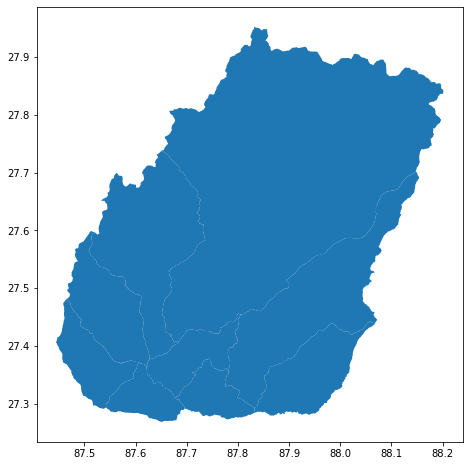

In [129]:
Taplejung.plot(figsize=(10, 8))

In [130]:
Taplejung['centroid'] = Taplejung.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [131]:
Taplejung.head(10)

,fid,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry,centroid,Area
0,1,1.0,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60719 27.37069, 87.60841 27.36969...",POINT (87.61926 27.30950),80.748299
1,7,1.0,TAPLEJUNG,Sidingba,Gaunpalika,1,"POLYGON ((88.04438 27.42030, 88.04365 27.41925...",POINT (87.94165 27.35222),187.221189
2,8,1.0,TAPLEJUNG,Sirijangha,Gaunpalika,1,"POLYGON ((88.14528 27.67003, 88.14526 27.66966...",POINT (87.94639 27.47594),437.723784
21,2,1.0,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50137 27.42926, 87.50407 27.42856...",POINT (87.51317 27.37358),125.382631
22,3,1.0,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51006 27.56917, 87.50990 27.56883...",POINT (87.54490 27.46539),191.486716
23,4,1.0,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.68583 27.70997, 87.68624 27.70960...",POINT (87.62770 27.58348),403.651173
24,5,1.0,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83403 27.95158, 87.83465 27.95139...",POINT (87.89701 27.70294),1694.588656
25,6,1.0,TAPLEJUNG,Phungling,Nagarpalika,1,"POLYGON ((87.80062 27.44133, 87.80143 27.43927...",POINT (87.71194 27.38090),114.199609
26,9,1.0,TAPLEJUNG,Pathibhara Yangwarak,Gaunpalika,1,"POLYGON ((87.74497 27.37754, 87.74537 27.37520...",POINT (87.75239 27.31524),84.309746


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


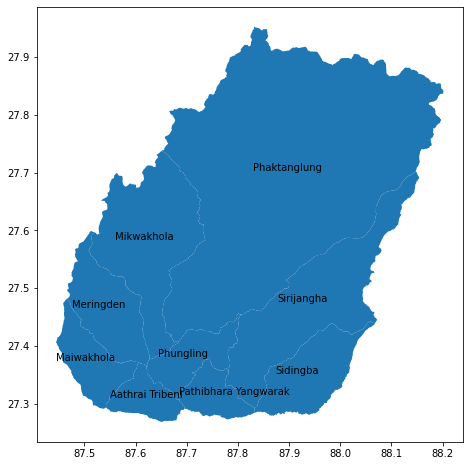

In [132]:
ax = Taplejung.plot(figsize=(10, 8))
for x, y, label in zip(Taplejung.centroid.x, Taplejung.centroid.y, Taplejung.GaPa_NaPa):
  offset =0

  ax.annotate(label, xy=(x, y), xytext=(-35,0), textcoords="offset points")

#Calculate area of each local bodies in Taplejung

In [133]:
Taplejung['Area'] = Taplejung['geometry'].to_crs({'proj':'cea'}) 

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [134]:
Taplejung['Area'] = Taplejung.area * 10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [135]:
Taplejung

,fid,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry,centroid,Area
0,1,1.0,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60719 27.37069, 87.60841 27.36969...",POINT (87.61926 27.30950),80.748299
1,7,1.0,TAPLEJUNG,Sidingba,Gaunpalika,1,"POLYGON ((88.04438 27.42030, 88.04365 27.41925...",POINT (87.94165 27.35222),187.221189
2,8,1.0,TAPLEJUNG,Sirijangha,Gaunpalika,1,"POLYGON ((88.14528 27.67003, 88.14526 27.66966...",POINT (87.94639 27.47594),437.723784
21,2,1.0,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50137 27.42926, 87.50407 27.42856...",POINT (87.51317 27.37358),125.382631
22,3,1.0,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51006 27.56917, 87.50990 27.56883...",POINT (87.54490 27.46539),191.486716
23,4,1.0,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.68583 27.70997, 87.68624 27.70960...",POINT (87.62770 27.58348),403.651173
24,5,1.0,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83403 27.95158, 87.83465 27.95139...",POINT (87.89701 27.70294),1694.588656
25,6,1.0,TAPLEJUNG,Phungling,Nagarpalika,1,"POLYGON ((87.80062 27.44133, 87.80143 27.43927...",POINT (87.71194 27.38090),114.199609
26,9,1.0,TAPLEJUNG,Pathibhara Yangwarak,Gaunpalika,1,"POLYGON ((87.74497 27.37754, 87.74537 27.37520...",POINT (87.75239 27.31524),84.309746


In [136]:
Taplejung['Area'].sum()

3319.3118022217004

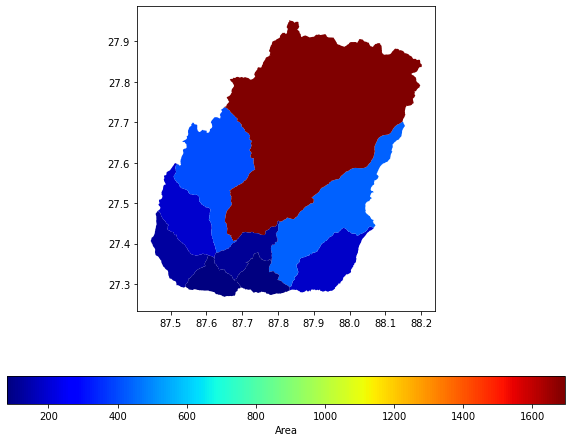

In [137]:
Taplejung.plot(column='Area',
           legend=True,
           legend_kwds={'label': "Area",
                        'orientation': "horizontal"},figsize=(10,8),cmap='jet')